In [205]:
import pandas as pd
import numpy as np

titanic=pd.read_csv('DataSets/titanic.csv')
print('Loaded titanic.csv')

Loaded titanic.csv


In [208]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [209]:
x=titanic['Cabin'].isnull() # Retrieve info about which all are

print("Total records:",len(x))
print("Totla Null Records:",x.sum())
percentage=x.mean()
print("Percentage of null record:{0:.1f}%".format(percentage*100))

# Now remove the indexes whose values are null
titanic.drop('Cabin',1,inplace=True)
# 0 indicates rows, 1 indicates delete columns. 
# Basically 0 deletes tuple, 1 deletes only column.
# inplace=True defines that dropping affects the variable, False defines temporary change.
print("Dropped Values which had 'Cabin' as NULL values.")

Total records: 418
Totla Null Records: 327
Percentage of null record:78.2%
Dropped Values which had 'Cabin' as NULL values.


C:\Users\Anirudh PC\AppData\Local\Temp\ipykernel_13708\1024006223.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  titanic.drop('Cabin',1,inplace=True)


In [210]:
# Imputing the null 'Age' Value
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

In [211]:
# Impute the Fare value.
# titanic["Fare"].dropna(inplace=True) <- drops all the null values of 'Fare'

print("Mean:",titanic['Fare'].mean(),"Median:",titanic['Fare'].median())

titanic["Fare"]=titanic['Fare'].fillna(titanic['Fare'].median())
print("Filled will median values")
print(titanic['Fare'].isnull().sum())

Mean: 35.627188489208635 Median: 14.4542
Filled will median values
0


In [ ]:
""" 
1. Data Collection
2. EDA(Explorative Data Analysis)
3. Preprocessing(Feature Engineering)
4. Building Model
5. Deployment
"""

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns
df=pd.read_csv('DataSets/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


<Axes: xlabel='Age', ylabel='Count'>

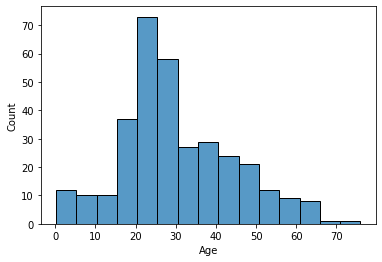

In [213]:
sns.histplot(df.Age)

In [217]:
# Example
q1=17
q3=23
iqr=q3-q1
print('Interquartile Range:',iqr)
max=q3+(1.5*iqr)
min=q1-(1.5*iqr)
print('Maximum:',max)
print('Minimum:',min)

Interquartile Range: 6
Maximum: 32.0
Minimum: 8.0


<Axes: xlabel='Fare'>

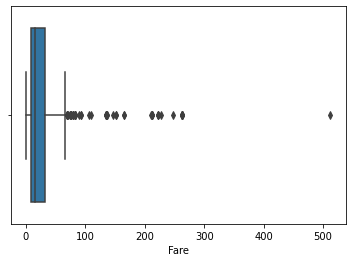

In [218]:
# Boxplot
sns.boxplot(x=titanic.Fare)

<Axes: xlabel='Sex', ylabel='count'>

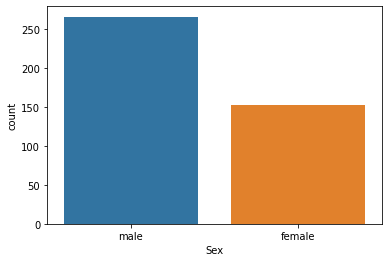

In [222]:
# Countplot for categorical data
sns.countplot(data=titanic,x='Sex')

<Axes: xlabel='Pclass', ylabel='Fare'>

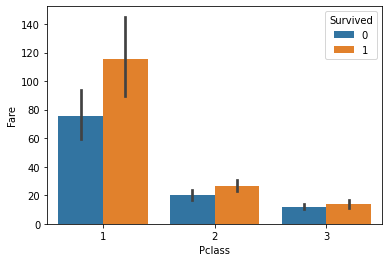

In [227]:
sns.barplot(data=titanic,x='Pclass',y='Fare',hue='Survived')

In [228]:
# Iris data set
iris=pd.read_csv('DataSets/Iris.csv')
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

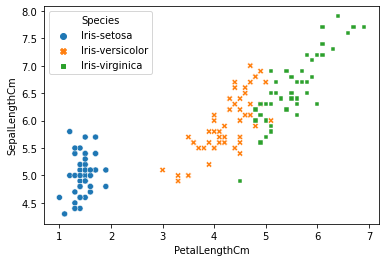

In [238]:
sns.scatterplot(data=iris,x='PetalLengthCm',
y='SepalLengthCm',
hue='Species',
style='Species')

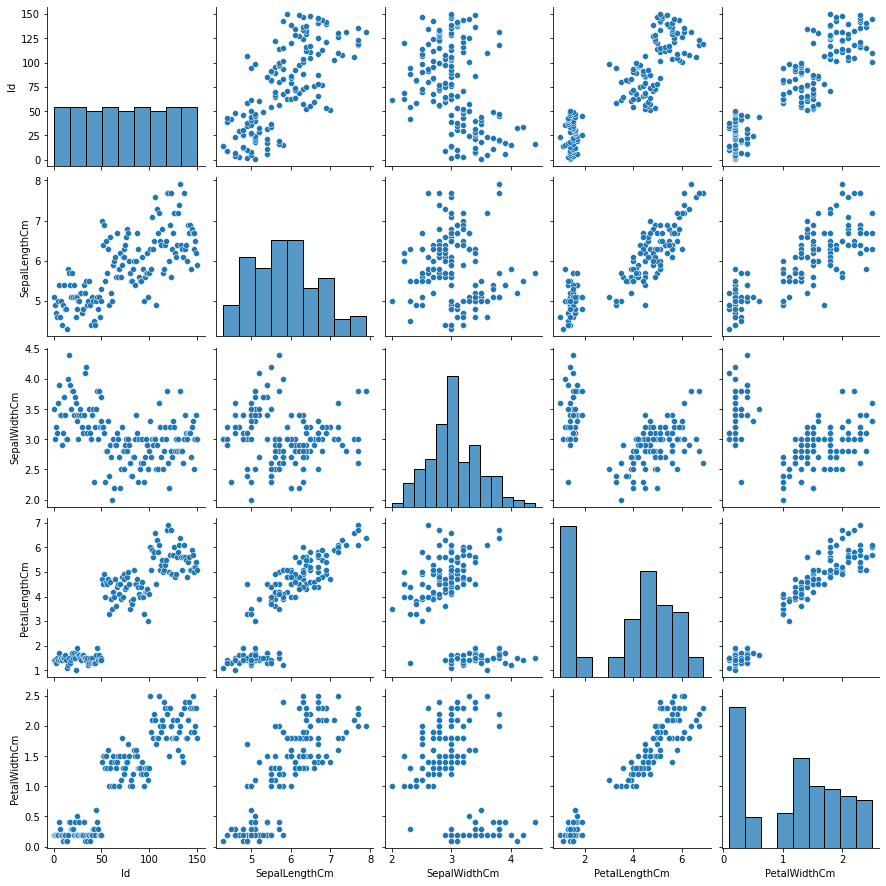

In [239]:
# Pair Plot
sns.pairplot(iris)

In [240]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

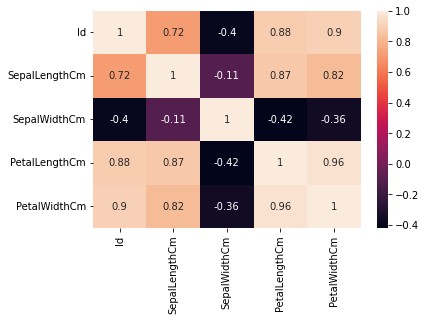

In [243]:
# Heat map, it uses square matrix.
# Uses correlation for creating heat map.
sns.heatmap(iris.corr(),annot=True)

In [ ]:
# Feature Engineering
# Steps in Feature enginerring:
# 1. Feature Transformation
# 2. Feature Construction.
# 3. Feature Selection
# 4. Feature Extraction

In [300]:
# Fifa dataset
fifa=pd.read_csv('DataSets/fifa.csv')
print("fifa data set loaded")

fifa data set loaded


In [264]:
fifa.shape

(18207, 89)

In [265]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [283]:
top=fifa.Nationality.value_counts().head(5)
top

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

In [301]:
# Function to replace low count countries to "others"
def replace(x):
    ls=['England','Germany','Spain','Argentina','France']
    if x not in ls:
        return "others"
    else:
        return x

In [302]:
fifa.Nationality=fifa.Nationality.apply(replace)
fifa.Nationality.value_counts()

others       12424
England       1662
Germany       1198
Spain         1072
Argentina      937
France         914
Name: Nationality, dtype: int64

In [303]:
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,others,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,others,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,others,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [304]:
employee=pd.read_csv('DataSets/employee.csv')
employee.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [308]:
#Filter the employee according to years experience.
# 1. Novice: 0-3 yrs
# 2. Intermediate 4-7 yrs
# 3. Experienced 8 & above

def exp(x):
    if x >=0 and x<=3:
        return "Novice"
    elif x >=4 and x<=7:
        return "Intermediate"
    else:
        return "Experienced"

print("Before Update")
print(employee.loc[[0,1,2,3,4],['TotalWorkingYears']])
employee.TotalWorkingYears=employee.TotalWorkingYears.apply(exp)
print('After update')
print(employee.loc[[0,1,2,3,4],['TotalWorkingYears']])

Before Update
   TotalWorkingYears
0                  8
1                 10
2                  7
3                  8
4                  6
After update
  TotalWorkingYears
0       Experienced
1       Experienced
2      Intermediate
3       Experienced
4      Intermediate


In [310]:
employee.TotalWorkingYears.value_counts()

Experienced     948
Intermediate    357
Novice          165
Name: TotalWorkingYears, dtype: int64

In [314]:
# Insurance Dataset
insurance=pd.read_csv('DataSets/insurance.csv')
print('Insurance dataset loaded')
insurance.head(2)

Insurance dataset loaded


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [317]:
print(insurance.info())
insurance.select_dtypes('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [398]:
print(insurance.sex.unique())
print(insurance.region.unique())
print(insurance.smoker.unique())

[0 1]
['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']


In [337]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(insurance.sex)
#le.classes_

LabelEncoder()

In [399]:
a=np.array(['male'])
#transform female:0,male:1
insurance.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55


In [400]:
insurance.sex=le.fit_transform(insurance.sex)

In [401]:
insurance.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55


In [414]:
# Afternoon session.
# one hot encoding
x=pd.get_dummies(insurance.region)
print(x.head())

   northeast  northwest  southeast  southwest
0          0          0          0          1
1          0          0          1          0
2          0          0          1          0
3          0          1          0          0
4          0          1          0          0


In [415]:
# Concatinating one hot encoding to data
y=pd.concat([insurance,x],axis=1)
# Dropping region column.
y.drop('region',axis=1)

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,yes,16884.92,0,0,0,1
1,18,1,33.8,1,no,1725.55,0,0,1,0
2,28,1,33.0,3,no,4449.46,0,0,1,0
3,33,1,22.7,0,no,21984.47,0,1,0,0
4,32,1,28.9,0,no,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,10600.55,0,1,0,0
1334,18,0,31.9,0,no,2205.98,1,0,0,0
1335,18,0,36.9,0,no,1629.83,0,0,1,0
1336,21,0,25.8,0,no,2007.95,0,0,0,1


In [404]:
import pandas as pd
import numpy as np
import seaborn as sns

iris=pd.read_csv('DataSets/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [390]:
iris=iris.drop('Id',axis=1)
print('ID deleted')

ID deleted


In [391]:
inp=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]#input variables
out=iris[['Species']]#output variables
print(inp.head(2))
print(out.head(2))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
       Species
0  Iris-setosa
1  Iris-setosa


In [392]:
inp

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [417]:
# Slicing on insurance

x=insurance.drop('expenses',axis=1)
y=insurance.expenses # or y=insurance[['expenses']]

print(x.head(2))
print(y.head(2))

   age  sex   bmi  children smoker     region
0   19    0  27.9         0    yes  southwest
1   18    1  33.8         1     no  southeast
0    16884.92
1     1725.55
Name: expenses, dtype: float64


In [418]:
# Testing model
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(x,y,
    test_size=0.15,
    random_state=42)

In [421]:
x1.shape

(1137, 6)

In [ ]:
# Types of machince learning
# 1. Supervised Machine Learning
# 2. Unseupervised Machine Learning
# 3. Reinforcement Machine Learning(Reward based learning)

# Supervised Machine Learning has 2 types:
# 1. Regression (continous data) ex:Insurance Prediction,Gold price prediction.
# 2. Classification (categorical Data) ex:gender
# 
# 1. Regression Models:
#   i. Linear Regeression.
#   ii.Decision Tree Regressor.#
